<h1>Emotion Sentiment Analysis</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
base = 'drive/My Drive/Colab Notebooks/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(base + "master.csv", encoding='utf-8')
df = df.reindex(np.random.permutation(df.index))
df['content'] = df['content'].astype(str)

In [ ]:
vocabulary_size = 200000
tokenizer = Tokenizer(num_words= 1000)
tokenizer.fit_on_texts(df['content'])

In [ ]:
word2index = tokenizer.word_index
index2word = {i:j for i, j in enumerate(word2index)}

In [ ]:
df.head()

,emotion,content
124127,joy,i've been back at med school for about three w...
46523,joy,i feel more productive and fulfilled already
329862,sad,i don t feel depressed i just feel like everyt...
193316,sad,i'm sitting here feeling isolated again
4118,joy,i feel so honored to be the first comment


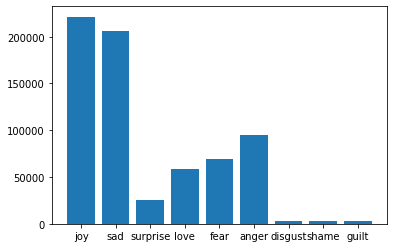

In [ ]:
emotions = df.emotion.unique()
sum_categorical_emotions = [df[df.emotion == i].size for i in emotions]
plt.bar(emotions, sum_categorical_emotions)
plt.show()

<h4>The basic human emotion classes can be as follows</h4>
<ul>
<li>Happiness
<li>Sadness
<li>Fear
<li>Disgust
<li>Anger
<li>love
<li>Surprise
<li>disgust
<li>guilt
</ul>

<h1>Using word embeddings to create a LSTM classification model</h1>

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [ ]:
sequences = tokenizer.texts_to_sequences(df['content'])
data = pad_sequences(sequences, maxlen=50)
X = data.reshape(len(data), 50)
X[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   7,
        86, 616,  28, 188,   6, 409, 464,   5,  27, 380, 144], dtype=int32)

In [ ]:
flag = pd.Series(list(df['emotion']))
Y = pd.get_dummies(flag)
Y = np.array(Y)
Y[100]

array([0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
inputs = Input(shape=[50])
layer = Embedding(100000, 500, input_length=50)(inputs)
layer = LSTM(512)(layer)
layer = Dense(256)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(9)(layer)
layer = Activation('softmax')(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 500)           50000000  
                                                                 
 lstm_1 (LSTM)               (None, 512)               2074624   
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 2313

In [ ]:
model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
896/896 [==============================] - 149s 159ms/step - loss: 0.4330 - accuracy: 0.8441 - val_loss: 0.2539 - val_accuracy: 0.9054
Epoch 2/10
896/896 [==============================] - 142s 159ms/step - loss: 0.2571 - accuracy: 0.9069 - val_loss: 0.2464 - val_accuracy: 0.9089
Epoch 3/10
896/896 [==============================] - 142s 158ms/step - loss: 0.2449 - accuracy: 0.9097 - val_loss: 0.2379 - val_accuracy: 0.9117
Epoch 4/10
896/896 [==============================] - 142s 158ms/step - loss: 0.2275 - accuracy: 0.9153 - val_loss: 0.2310 - val_accuracy: 0.9156
Epoch 6/10
896/896 [==============================] - 142s 158ms/step - loss: 0.2176 - accuracy: 0.9193 - val_loss: 0.2306 - val_accuracy: 0.9178
Epoch 7/10
896/896 [==============================] - 142s 158ms/step - loss: 0.2042 - accuracy: 0.9244 - val_loss: 0.2275 - val_accuracy: 0.9202
Epoch 8/10
896/896 [==============================] - 142s 158ms/step - loss: 0.1904 - accuracy: 0.9288 - val_loss: 0.2275 -

In [ ]:
model.save('master_model.h5')

<h1>Prediction and Evaluation</h1>

In [ ]:
from keras.models import load_model
model = load_model('master_model.h5')

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
predict = np.argmax(y_predict, axis = 1)
y_test_class = np.argmax(y_test, axis = 1)
cm = confusion_matrix(predict, y_test_class)

[Text(0, 0.5, 'joy'),
 Text(0, 1.5, 'sad'),
 Text(0, 2.5, 'surprise'),
 Text(0, 3.5, 'love'),
 Text(0, 4.5, 'fear'),
 Text(0, 5.5, 'anger'),
 Text(0, 6.5, 'disgust'),
 Text(0, 7.5, 'shame'),
 Text(0, 8.5, 'guilt')]

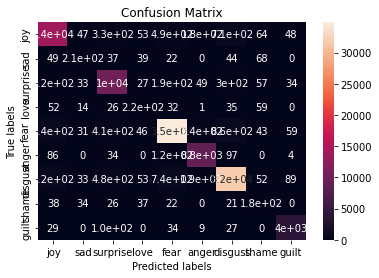

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
sns.set(rc={'figure.figsize':(15, 11)})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(emotion)
ax.yaxis.set_ticklabels(emotion)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test_class, predict)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('emotion: {}'.format(emotions))

precision: [0.87749251 0.4465812  0.91694807 0.50452489 0.93225375 0.96197384
 0.93151724 0.50140056 0.95181861]
recall: [0.8768222  0.52119701 0.87388014 0.4665272  0.95468998 0.91943277
 0.93860758 0.34291188 0.94512195]
fscore: [0.87715723 0.48101266 0.89489623 0.48478261 0.94333848 0.94022235
 0.93504897 0.407281   0.94845846]
support: [15709   401 11497   478 36482  9520 34027   522  4264]
emotion: ['joy' 'sad' 'surprise' 'love' 'fear' 'anger' 'disgust' 'shame' 'guilt']


In [ ]:
score_table = PrettyTable(['Emotion', 'Precision', 'Recall', 'F-score', 'Support'])
for i in range(0, len(emotion)):
    score_table.add_row([emotions[i], precision[i], recall[i], fscore[i], support[i]])
print(score_table)

+----------+--------------------+--------------------+---------------------+---------+
| Emotion  |     Precision      |       Recall       |       F-score       | Support |
+----------+--------------------+--------------------+---------------------+---------+
|   joy    | 0.8774925144932153 | 0.8768222038321981 |  0.8771572311023372 |  15709  |
|   sad    | 0.4465811965811966 | 0.5211970074812967 | 0.48101265822784806 |   401   |
| surprise | 0.9169480697271151 | 0.8738801426459076 |  0.8948962322971409 |  11497  |
|   love   | 0.504524886877828  | 0.4665271966527197 |  0.4847826086956522 |   478   |
|   fear   | 0.9322537473233404 | 0.9546899841017488 |  0.943338479456136  |  36482  |
|  anger   | 0.9619738432794812 | 0.9194327731092437 |  0.9402223535098555 |   9520  |
| disgust  | 0.9315172373563554 | 0.9386075763364388 |  0.9350489657898204 |  34027  |
|  shame   | 0.5014005602240896 | 0.342911877394636  |  0.4072810011376565 |   522   |
|  guilt   | 0.951818611242324  | 0.9451219

In [ ]:
statement = "The room was very flithy."
sequences = tokenizer.texts_to_sequences([statement])
data = pad_sequences(sequences, maxlen=50)
emotion = df.emotion.unique()
y = model.predict(data)
y = np.argmax(y)
print(emotion[y])

disgust
